<a href="https://colab.research.google.com/github/susanavillar/VISUALIZACION-DE-DATOS/blob/main/Clase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

# Sube el archivo CSV desde tu computadora
uploaded = files.upload()

Saving datos_ejercicio_ventas.csv to datos_ejercicio_ventas.csv


In [3]:
import pandas as pd

df = pd.read_csv('datos_ejercicio_ventas.csv')

# Para verificar que se ha cargado correctamente
print(df.head())  # Muestra las primeras filas del archivo


         COUNTRY        SUBBRAND  YEAR  MONTH     SCENARIO FORECAST  \
0       Portugal     Lipton (L3)  2023     12  AI_forecast  AI_P02F   
1  Great Britain     Lipton (L3)  2023     12  AI_forecast  AI_P10F   
2          Spain  Pepsi Max (L3)  2023     12  AI_forecast  AI_P09F   
3  Great Britain        7up (L3)  2024     12  AI_forecast  AI_P10F   
4        Hungary     Lipton (L3)  2023      9  AI_forecast  AI_P03F   

   FORECAST_YEAR         AMOUNT  
0         2023.0  754356.237194  
1         2023.0  560030.558029  
2         2023.0   88501.980847  
3         2023.0  363224.511516  
4         2023.0  396176.120491  


# Preparación de los datos

1. Numero de Actuals y forecasts
2. Horizonde de precisión:
3. Nº de paises, productos, ...
4. Histórico de datos de actuals/forecast
5. Forecast distintos

### Comenzamos viendo el **número de actuals y de forecasts** en SCENARIO

In [4]:
conteo_scenario = df['SCENARIO'].value_counts()
print(conteo_scenario)

SCENARIO
AI_forecast    17766
actual           900
Name: count, dtype: int64


### **Horizonte de precisión**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# Definir el país y la bebida específicos
pais_especifico = "Portugal"
bebida_especifica = "Lipton (L3)"

# Filtrar el DataFrame para el país y bebida específicos
conteo_forecast = df[(df['COUNTRY'] == pais_especifico) &
                      (df['SUBBRAND'] == bebida_especifica) &
                      (df['FORECAST'] == 'AI_P02F')];

# Mostrar el resultado
print(f"El número de meses que he predicho para {pais_especifico} y {bebida_especifica} es: \n\n{conteo_forecast}")

El número de meses que he predicho para Portugal y Lipton (L3) es: 

        COUNTRY     SUBBRAND  YEAR  MONTH     SCENARIO FORECAST  \
0      Portugal  Lipton (L3)  2023     12  AI_forecast  AI_P02F   
742    Portugal  Lipton (L3)  2023      9  AI_forecast  AI_P02F   
953    Portugal  Lipton (L3)  2024      5  AI_forecast  AI_P02F   
2311   Portugal  Lipton (L3)  2023      5  AI_forecast  AI_P02F   
3353   Portugal  Lipton (L3)  2024      7  AI_forecast  AI_P02F   
4945   Portugal  Lipton (L3)  2023      2  AI_forecast  AI_P02F   
5667   Portugal  Lipton (L3)  2023      8  AI_forecast  AI_P02F   
6813   Portugal  Lipton (L3)  2023      3  AI_forecast  AI_P02F   
7152   Portugal  Lipton (L3)  2023     10  AI_forecast  AI_P02F   
9619   Portugal  Lipton (L3)  2024      2  AI_forecast  AI_P02F   
9620   Portugal  Lipton (L3)  2024      4  AI_forecast  AI_P02F   
12899  Portugal  Lipton (L3)  2023      4  AI_forecast  AI_P02F   
13033  Portugal  Lipton (L3)  2024      1  AI_forecast  AI_P

### **Histórico de datos de actuals/forecast**

Un histórico de datos de actuals/forecast es un registro que guarda tanto los valores reales obtenidos en el pasado (actuals) como los valores que se proyectaron o pronosticaron para esos mismos períodos (forecast). Este tipo de archivo se utiliza comúnmente en análisis de datos financieros, comerciales o de inventarios para realizar comparaciones, evaluar el desempeño de los pronósticos y mejorar la precisión de las predicciones futuras.

In [6]:
grouped_data = df.groupby(['YEAR', 'MONTH', 'SCENARIO'])['AMOUNT'].sum().reset_index(name='COUNT')

# Now create the pivot table using the grouped data
historico_pivot = grouped_data.pivot_table(
    index=['YEAR', 'MONTH'],
    columns='SCENARIO',
    values='COUNT',  # Use the 'COUNT' column we created
    aggfunc='sum'  # Sum the counts if needed (in case there are still duplicates)
)

# Renombrar las columnas para mayor claridad
historico_pivot.columns = ['Ventas_actual', 'Ventas_forecast']

# Mostrar el DataFrame pivotado
print(historico_pivot)


            Ventas_actual  Ventas_forecast
YEAR MONTH                                
2023 1       6.501285e+07     2.808880e+07
     2       1.351231e+08     2.610437e+07
     3       2.337607e+08     3.593163e+07
     4       3.045121e+08     3.085725e+07
     5       4.181030e+08     3.690245e+07
     6       4.928364e+08     3.759999e+07
     7       5.948150e+08     3.403227e+07
     8       7.092929e+08     3.817477e+07
     9       7.360138e+08     3.193116e+07
     10      7.575648e+08     3.144918e+07
     11      8.756027e+08     3.290419e+07
     12      1.014579e+09     3.483174e+07
2024 1       8.179935e+08     2.689091e+07
     2       8.109146e+08     2.989003e+07
     3       9.745356e+08     3.449749e+07
     4       9.535105e+08     3.369920e+07
     5       1.028894e+09     3.677264e+07
     6       1.022603e+09     3.508763e+07
     7       9.624845e+08     3.571339e+07
     8       8.972356e+08     3.855460e+07
     9       7.411355e+08              NaN
     10    

lo representamos:

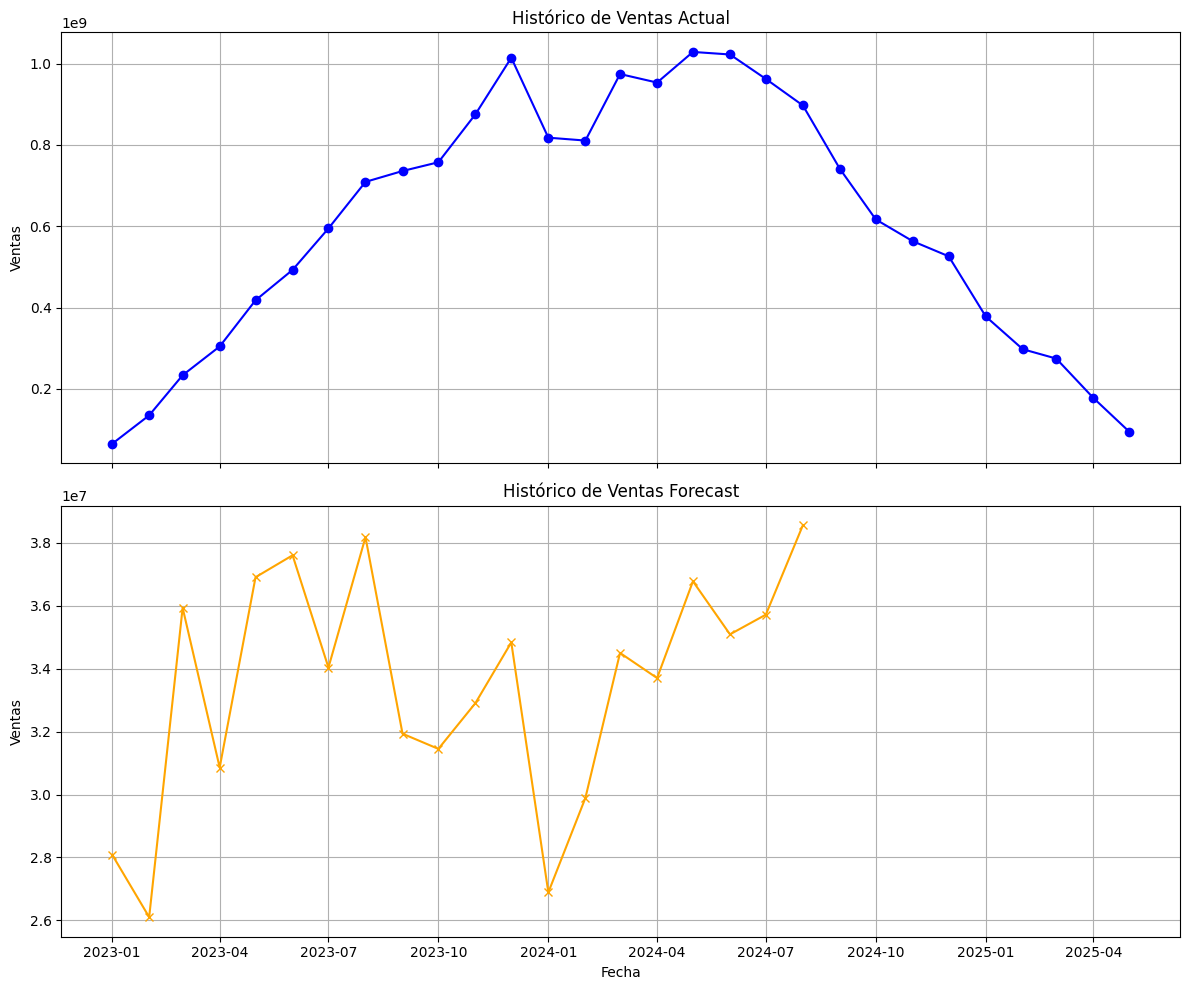

In [7]:
# Supongamos que 'historico_pivot' ya tiene 'YEAR', 'MONTH', 'Ventas_actual', 'Ventas_forecast'
# Si no lo tienes aún, puedes crear la columna 'Fecha' como antes:
historico_pivot = historico_pivot.reset_index()
historico_pivot['Fecha'] = pd.to_datetime(historico_pivot[['YEAR', 'MONTH']].assign(day=1))

# Configurar el tamaño del gráfico y crear dos subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Gráfico para Ventas Actual
axes[0].plot(historico_pivot['Fecha'], historico_pivot['Ventas_actual'], label='Ventas Actual', color='blue', marker='o')
axes[0].set_title('Histórico de Ventas Actual')
axes[0].set_ylabel('Ventas')
axes[0].grid(True)

# Gráfico para Ventas Forecast
axes[1].plot(historico_pivot['Fecha'], historico_pivot['Ventas_forecast'], label='Ventas Forecast', color='orange', marker='x')
axes[1].set_title('Histórico de Ventas Forecast')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Ventas')
axes[1].grid(True)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


1. Numero de Actuals y forecasts ✅
2. Horizonde de precisión: ✅
3. Nº de paises, productos, ... ✅
4. Histórico de datos de actuals/forecast✅
5. Forecast distintos

# Preguntas que hay que responder

1. Como se distribuyen las ventas realizadas en:
 *  Cada país
 *  Cada mes y año
 *  Cada marca
2. Cual es la tendencia y estacionalidad de:
 *  Todas las ventas del país con menos ventas
 *  La marca con más ventas
3. Cuales son las predicciones hechas en España y como de buenas son

## 1
Empezamos viendo la distribución de las ventas💸 :



### Por paises

In [8]:
!pip install plotly

In [9]:
!pip install country_converter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.1 MB/s eta 0:00:00


In [10]:
import country_converter as coco
import plotly.express as px
import pandas as pd

Vamos a comprobar primero la cantidad de ventas en cada país

In [11]:
print(df['COUNTRY'].value_counts())

COUNTRY
Great Britain    4008
Netherlands      2476
Hungary          2384
Denmark          2294
Spain            2152
Norway           2062
Czech            1403
Portugal         1179
Italy             708
Name: count, dtype: int64


Ahora continuamos preprocesando los datos (añadiendo variables, quitando variables, ...)  para poder representarlos con el gráfico que deseamos

In [12]:
# Create a new column 'COUNTRY_CODE' with ISO-3 codes
base_actual = df[df['SCENARIO'] == 'actual']
base_ampliada = base_actual.groupby('COUNTRY')['AMOUNT'].sum().reset_index(name='TOTAL')
base_ampliada['COUNTRY_CODE'] = coco.convert(names=base_ampliada['COUNTRY'], to='ISO3')
display(base_ampliada)

,COUNTRY,TOTAL,COUNTRY_CODE
0,Czech,3.535164e+07,CZE
1,Denmark,5.659668e+07,DNK
2,Great Britain,3.347786e+08,GBR
3,Hungary,4.153991e+07,HUN
4,Italy,4.345404e+07,ITA
5,Netherlands,6.395943e+07,NLD
6,Norway,5.121406e+07,NOR
7,Portugal,3.488807e+07,PRT
8,Spain,8.131266e+06,ESP


Ahora ya podemos pasar a la parte del código para representar

In [13]:
# Now use 'COUNTRY_CODE' for the 'locations' argument in px.choropleth
fig = px.choropleth(
    base_ampliada,
    locations="COUNTRY_CODE",
    color="TOTAL",
    hover_name="COUNTRY",
    color_continuous_scale=px.colors.sequential.Peach,
    projection="natural earth"
)
fig.show()

### Por cada mes y año

In [14]:
import plotly.express as px

base_mesannio = base_actual.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum().reset_index(name='VENTAS')
display(base_mesannio)

,YEAR,MONTH,VENTAS
0,2023,1,2.808880e+07
1,2023,2,2.610437e+07
2,2023,3,3.593163e+07
3,2023,4,3.085725e+07
4,2023,5,3.690245e+07
5,2023,6,3.759999e+07
6,2023,7,3.403227e+07
7,2023,8,3.817477e+07
8,2023,9,3.193116e+07
9,2023,10,3.144918e+07


Con el propósito de conocer mejor nuestros datos vamos a visualizar nuestros datos primero por separado, es decir, vamos a crear dos gráficos, uno para la distribucion de las ventas por meses, y otro por año.

In [15]:
#AÑOS
fig = px.pie(base_mesannio, values='VENTAS', names='YEAR',
             title='Distribución de las ventas por año',
             color_discrete_sequence=px.colors.qualitative.Pastel2_r)
fig.show()

#MESES
meses = base_mesannio.groupby('MONTH')['VENTAS'].sum().reset_index()

figu = px.bar(meses, x='MONTH', y='VENTAS',
             title='Distribución de las ventas por mes',
             labels={'MONTH': 'Mes', 'VENTAS': 'Número de Ventas'},
             color_discrete_sequence=px.colors.qualitative.Pastel2)
figu.show()

Ahora representamos todo en un solo gráfico. Dependiendo del propósito para el que lo queramos utilizar será más útil un gráfico u otro. En este caso, he elegido dos tipos: un *gráfico de barras* acumulado, para poder comparar mejor las ventas en diferentes meses o años, y un *mapa de calor*, que sirve mejor para detectar patrones.  

In [16]:
from plotly.subplots import make_subplots
figur = make_subplots(rows=1, cols=2,
                    subplot_titles=("Distribución de las ventas por mes y año", "Mapa de Calor de Ventas"))


# Bar chart (first subplot)
barras = px.bar(base_mesannio, x='MONTH', y='VENTAS', color='YEAR', barmode='group',
                   labels=dict(x="Mes", y="Ventas", color="Año"),
                   color_discrete_sequence=px.colors.qualitative.Pastel)

# Heatmap (second subplot)
heatmap = px.imshow(base_mesannio.pivot(index='YEAR', columns='MONTH', values='VENTAS'),
                    labels=dict(x="Mes", y="Año", color="Ventas"),
                    color_continuous_scale="agsunset")

# Add traces to subplots
for trace in barras.data:
    figur.add_trace(trace, row=1, col=1)

for trace in heatmap.data:
    figur.add_trace(trace, row=1, col=2)

# Update layout
figur.update_layout(title_text="Ventas por Mes y Año", showlegend=False)

figur.show()

### Cada marca

In [17]:
base_marcas = base_actual.groupby(['SUBBRAND'])['AMOUNT'].sum().reset_index(name='VENDIDAS')
display(base_marcas)

,SUBBRAND,VENDIDAS
0,7up (L3),1.876851e+07
1,7up Free (L3),3.427630e+07
2,Lipton (L3),7.286515e+07
3,Mountain Dew (L3),7.474391e+06
4,Pepsi Max (L3),3.966987e+08
5,Pepsi Regular (L3),1.398307e+08


In [18]:
fig = px.bar(base_marcas, y='SUBBRAND', x='VENDIDAS', orientation='h',
            title='Ventas por Marca',
            labels={'BRAND': 'Marca', 'VENDIDAS': 'Ventas'})
fig.show()

## 2
A continuación vamos a ver la tendencia y estacionalidad

### País con menos ventas

Lo primero que tenemos que saber es el pais que ha tenido menos ventas. Por las gráficas anteriores, podemos saber, sin tener que programar nada adicional, que el país con menos ventas es España.

Sabiendo esto, ahora vamos a filtrar los datos para el país que nos interesa, es decir, vamos a crear un DataFrame que solo contenga los datos de Italia. Además, vamos a preparar nuestros datos para el análisis de la serie temporal.

In [19]:
datos_spain = base_actual[base_actual['COUNTRY'] == 'Spain']
datos_spain = datos_spain.drop(['FORECAST', 'FORECAST_YEAR'], axis=1)

# Convertimos las columnas 'YEAR' y 'MONTH' en una sola columna 'DATE'
datos_spain['DATE'] = pd.to_datetime(datos_spain['YEAR'].astype(str) + '-' + datos_spain['MONTH'].astype(str) + '-01')
display(datos_spain)

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,AMOUNT,DATE
296,Spain,7up Free (L3),2023,10,actual,83196.895876,2023-10-01
414,Spain,7up Free (L3),2024,1,actual,60318.994231,2024-01-01
728,Spain,7up Free (L3),2024,2,actual,59482.850585,2024-02-01
729,Spain,Lipton (L3),2024,2,actual,8003.513133,2024-02-01
835,Spain,7up (L3),2024,4,actual,74882.992962,2024-04-01
...,...,...,...,...,...,...,...
18452,Spain,7up Free (L3),2023,1,actual,54525.175586,2023-01-01
18467,Spain,Lipton (L3),2023,7,actual,13255.914482,2023-07-01
18469,Spain,7up Free (L3),2023,7,actual,92339.329882,2023-07-01
18535,Spain,Pepsi Max (L3),2023,2,actual,80772.495122,2023-02-01


Actualmente la situación es:

In [20]:
# prompt: Scatter Plot para representar los datos de datos_spain donde cada date tenga un color diferente y sin que aparezca la leyenda de DATE

# Create the scatter plot
figura = px.scatter(datos_spain, x='DATE', y='AMOUNT', color='DATE', color_discrete_sequence=px.colors.qualitative.Set3)

# Remove the legend
figura.update_layout(showlegend=False)

figura.show()

Como lo que buscamos es estudiar la estacionalidad y la tendencia de las ventas vamos a hacer lo siguiente:

In [21]:
datos_spain = datos_spain.groupby(['DATE'])['AMOUNT'].sum().reset_index(name='SALES')

Y creamos la gráfica para visualizarlo:

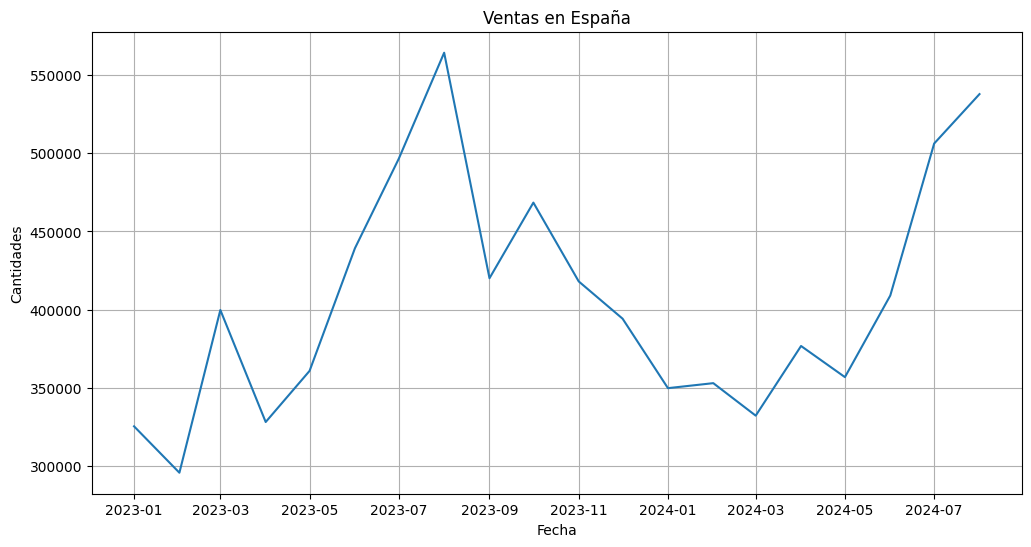

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(datos_spain['DATE'], datos_spain['SALES'])
plt.xlabel('Fecha')
plt.ylabel('Cantidades')
plt.title('Ventas en España')
plt.grid(True)
plt.show()

Ahora, para estudiar la tendencia y la estacionalidad tenemos que descomponer la serie temporal

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

resultados = seasonal_decompose(datos_spain['SALES'], model='additive', period=10)  # Assuming monthly seasonality


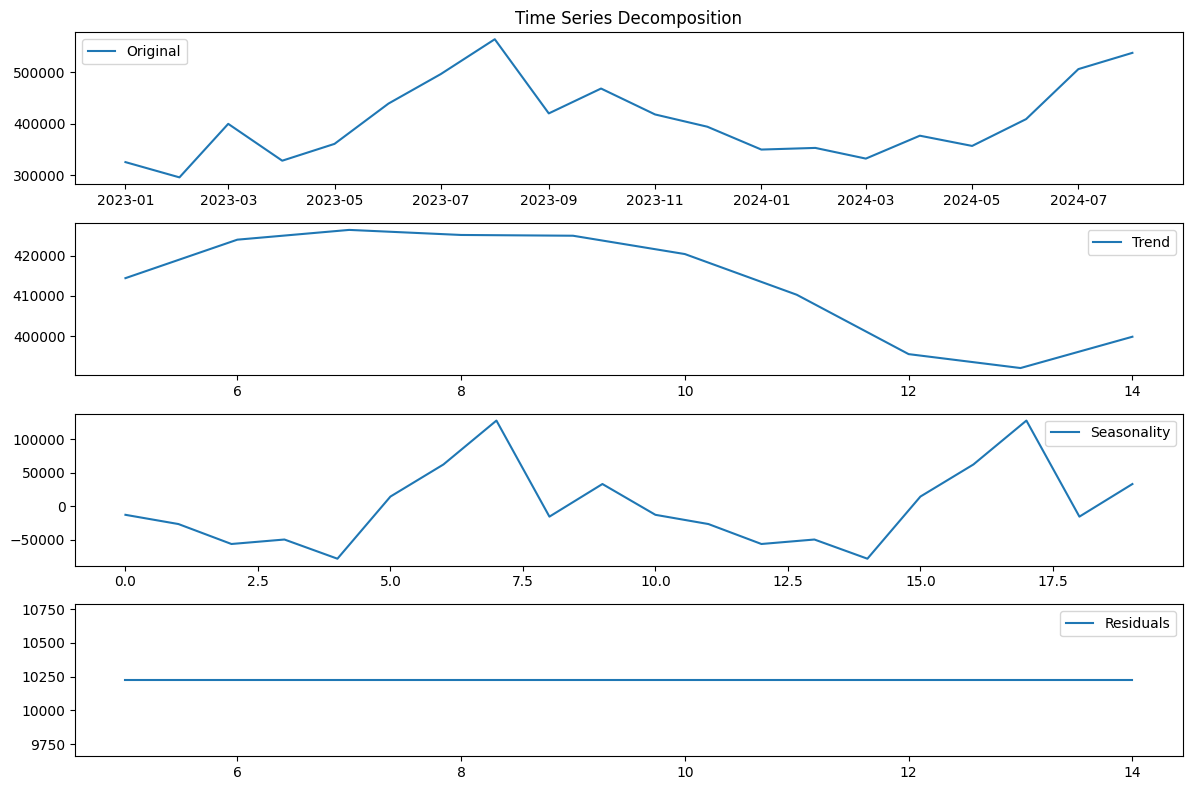

In [24]:

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(datos_spain['DATE'], datos_spain['SALES'], label='Original')
plt.legend(loc='best')
plt.title('Time Series Decomposition')

plt.subplot(412)
plt.plot(resultados.trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(resultados.seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(resultados.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Creo en mi humilde opinion que no hay ni una tendencia ni una estacionalidad marcada pero basicaente porque es un periodo de tiempo muy pequeño. Probablemente la tendencia sea sinusuidal, pero como he dicho antes, no se puede saber con certeza.

Aquí parece que los residuos son constantes o están cercanos a cero, lo cual es inusual, ya que generalmente los residuos muestran variación.

### La marca con más ventas

Al igual que antes, sabemos por el estudio anterior que la marca que ha tenido más ventas ha sido Pepsi Max.

Con esta información en mente, comenzamos con el mismo procedimiento que antes.

In [25]:
datos_pepsim = base_actual[base_actual['SUBBRAND'] == 'Pepsi Max (L3)']
datos_pepsim = datos_pepsim.drop(['FORECAST', 'FORECAST_YEAR'], axis=1)

# Convertimos las columnas 'YEAR' y 'MONTH' en una sola columna 'DATE'
datos_pepsim['DATE'] = pd.to_datetime(datos_pepsim['YEAR'].astype(str) + '-' + datos_pepsim['MONTH'].astype(str) + '-01')
display(datos_pepsim)

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,AMOUNT,DATE
277,Portugal,Pepsi Max (L3),2023,10,actual,1.885949e+05,2023-10-01
724,Denmark,Pepsi Max (L3),2024,2,actual,2.557571e+06,2024-02-01
727,Italy,Pepsi Max (L3),2024,2,actual,1.928897e+05,2024-02-01
740,Norway,Pepsi Max (L3),2024,2,actual,2.119033e+06,2024-02-01
836,Denmark,Pepsi Max (L3),2024,4,actual,2.090877e+06,2024-04-01
...,...,...,...,...,...,...,...
18302,Netherlands,Pepsi Max (L3),2024,3,actual,1.102766e+06,2024-03-01
18349,Great Britain,Pepsi Max (L3),2023,6,actual,1.277072e+07,2023-06-01
18535,Spain,Pepsi Max (L3),2023,2,actual,8.077250e+04,2023-02-01
18537,Hungary,Pepsi Max (L3),2023,2,actual,3.621544e+05,2023-02-01


In [26]:
# Modificamos nuestros datos para poder representarlos correctamente
datos_pepsim = datos_pepsim.sort_values(by='DATE')
datos_pepsim['COUNTRY_CODE'] = coco.convert(names=datos_pepsim['COUNTRY'], to='ISO3')


# Creamos el bubble map
fig = px.scatter_geo(datos_pepsim, locations="COUNTRY_CODE", locationmode='ISO-3',
                     color="AMOUNT", size="AMOUNT", hover_name="COUNTRY",
                     animation_frame="DATE",  # Animate by date
                     projection="natural earth", title="Ventas de Pepsi Max por país a través del tiempo",
                     color_continuous_scale=px.colors.sequential.Aggrnyl_r)

fig.show()

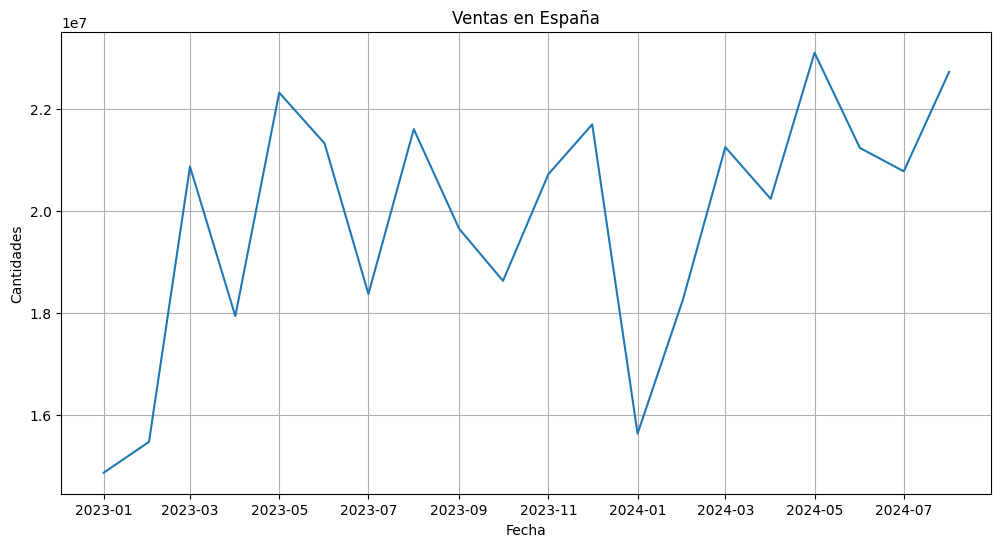

In [27]:
datos_pepsim = datos_pepsim.groupby(['DATE'])['AMOUNT'].sum().reset_index(name='SALES')

plt.figure(figsize=(12, 6))
plt.plot(datos_pepsim['DATE'], datos_pepsim['SALES'])
plt.xlabel('Fecha')
plt.ylabel('Cantidades')
plt.title('Ventas en España')
plt.grid(True)
plt.show()

Descomposición:

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

resulta2 = seasonal_decompose(datos_pepsim['SALES'], model='additive', period=10)  # Assuming monthly seasonality


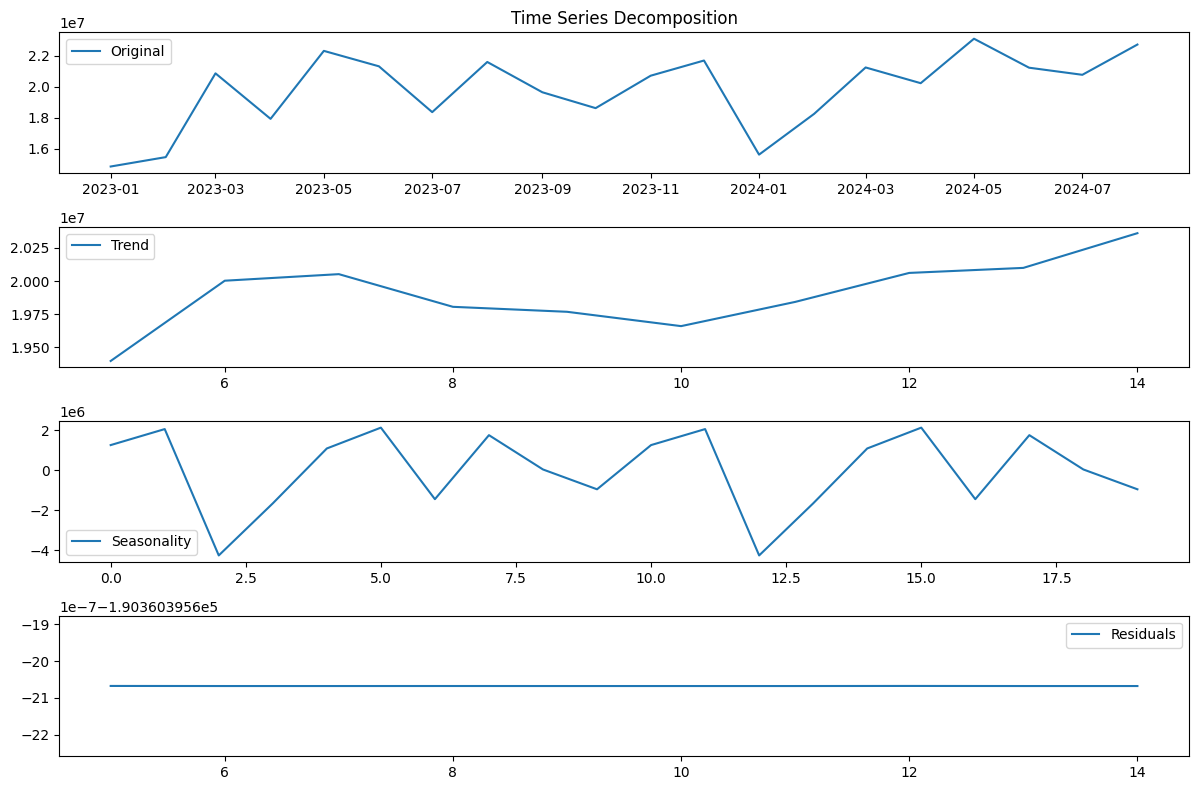

In [29]:

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(datos_pepsim['DATE'], datos_pepsim['SALES'], label='Original')
plt.legend(loc='best')
plt.title('Time Series Decomposition')

plt.subplot(412)
plt.plot(resulta2.trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(resulta2.seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(resulta2.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

CONCLUSIONES DE LOS GRÁFICOS

## 3

Por último, calcularemos las predicciones hechas para España y como de fiables son. Para esto, comenzaremos separando nuestros datos reales y nuestras predicciones.


In [30]:
predictiones_spain = df[(df['COUNTRY'] == 'Spain') & (df['SCENARIO'] == 'AI_forecast')]
predictiones_spain = predictiones_spain.sort_values(by='YEAR')
#display(predictiones_spain)


reales_spain = df[(df['COUNTRY'] == 'Spain') & (df['SCENARIO'] == 'actual')]
reales_spain = reales_spain.drop(['FORECAST', 'FORECAST_YEAR'], axis=1)
#reales_spain['DATE'] = pd.to_datetime(reales_spain['YEAR'].astype(str) + '-' + reales_spain['MONTH'].astype(str) + '-01')
#predictiones_spain = reales_spain.groupby(['YEAR','MONTH'])['AMOUNT'].sum().reset_index(name='TOTAL')
#display(reales_spain)

Primero queremos ver una vista general de las predicciones

In [31]:
fig = px.scatter(predictiones_spain,
                 x='MONTH',
                 y='AMOUNT',
                 color='SCENARIO',
                 facet_col='SUBBRAND',
                 facet_row='YEAR',
                 labels={'MONTH': 'Month', 'AMOUNT': 'Sales Amount', 'SUBBRAND': 'Subbrand', 'YEAR': 'Year'},
                 title='Predicciones',
                 color_discrete_sequence=px.colors.sequential.Blackbody_r)

fig.update_layout(height=1500)  # Adjust height as needed for visibility
fig.show()


# Create the heatmap
fig = px.density_heatmap(predictiones_spain,
                         x="MONTH",
                         y="YEAR",
                         z="AMOUNT",
                         facet_col="SCENARIO", # Use SCENARIO for facets
                         labels={'MONTH': 'Mes', 'YEAR': 'Año', 'AMOUNT': 'Predicciones', 'SCENARIO': 'Escenario'},
                         title='Mapa de Calor',
                         color_continuous_scale='twilight')


fig.update_layout(height=600)
fig.show()

In [32]:
# prompt: grafico de tarta para ver las predicciones por marca

# Create a pie chart for sales by brand
fig = px.pie(base_marcas, values='VENDIDAS', names='SUBBRAND',
             title='Distribución de las ventas por marca',
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

Esto nos ayuda un poco para ver como se distribuyen nuestros datos, sin embargo para poder hacernos una mejor idea y poder ver los datos de una forma más general respecto al tiempo vamos a usar el siguiente gráfico

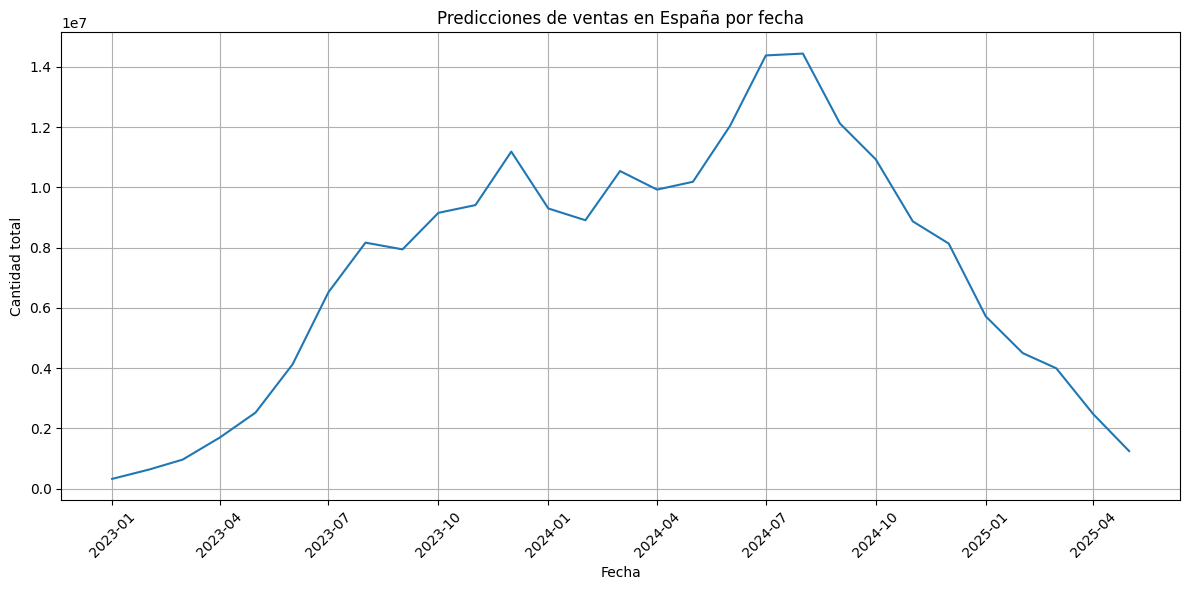

In [33]:
predictiones_spain['DATE'] = pd.to_datetime(predictiones_spain['YEAR'].astype(str) + '-' + predictiones_spain['MONTH'].astype(str) + '-01')
predicciones_por_fecha = predictiones_spain.groupby('DATE')['AMOUNT'].sum().reset_index()

# Create the time series plot
plt.figure(figsize=(12, 6))
plt.plot(predicciones_por_fecha['DATE'], predicciones_por_fecha['AMOUNT'])
plt.xlabel('Fecha')
plt.ylabel('Cantidad total')
plt.title('Predicciones de ventas en España por fecha')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Finalmente, vamos a valorar como de buenas son nuestras predicciones

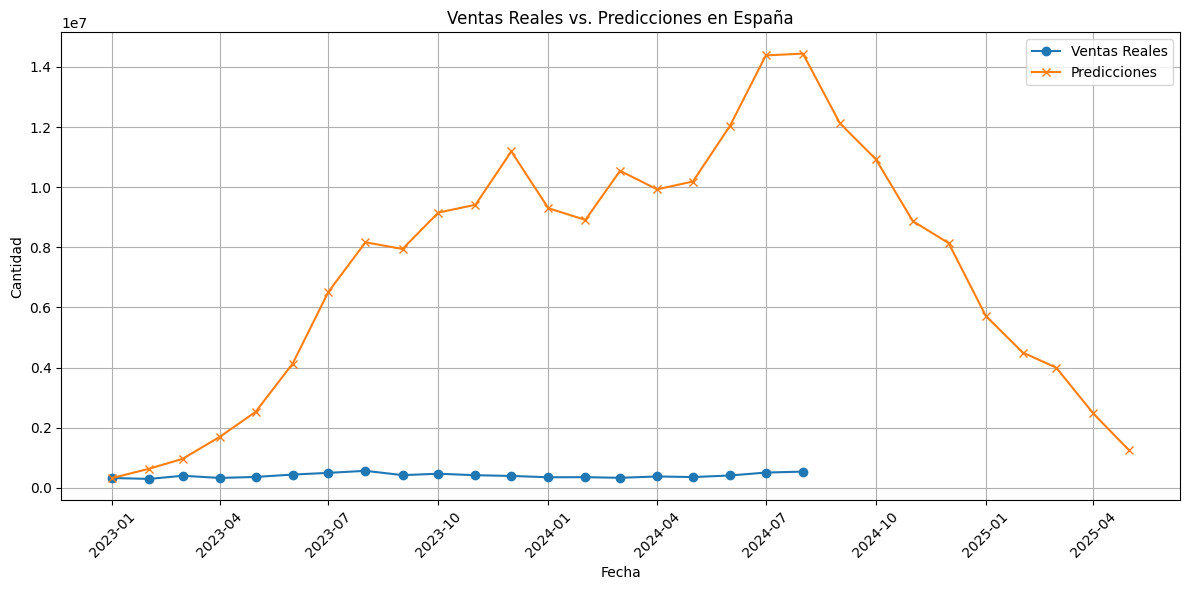

In [34]:
# prompt: un gráfico donde se pueda ver ambas lineas, las de las ventas reales (reales_spain) y las predicciones

# Assuming 'reales_spain' and 'predictiones_spain' DataFrames are already prepared as in your previous code.

# Convert 'YEAR' and 'MONTH' columns to datetime objects for both DataFrames
reales_spain['DATE'] = pd.to_datetime(reales_spain['YEAR'].astype(str) + '-' + reales_spain['MONTH'].astype(str) + '-01')
reales_spain_grouped = reales_spain.groupby('DATE')['AMOUNT'].sum().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(reales_spain_grouped['DATE'], reales_spain_grouped['AMOUNT'], label='Ventas Reales', marker='o')
plt.plot(predicciones_por_fecha['DATE'], predicciones_por_fecha['AMOUNT'], label='Predicciones', marker='x')


plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.title('Ventas Reales vs. Predicciones en España')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
# prompt: dos graficos de tarta para las ventas por marca, uno para las predicciones y otra para los reales, y que abarquen solo hasta la fecha que lleguen los datos reales

# Assuming 'base_marcas' DataFrame exists (from previous code)
# and contains 'SUBBRAND' and 'VENDIDAS' columns.
import plotly.graph_objects as go
# Filter data for actual sales and predictions up to the last date of actual sales
last_actual_date = reales_spain_grouped['DATE'].max() # Get last date of actual sales
predictions_filtered = predictiones_spain[predictiones_spain['DATE'] <= last_actual_date]
actuals_filtered = reales_spain[reales_spain['DATE'] <= last_actual_date]

# Grouped sales for plotting
predictiones_spain_grouped = predictions_filtered.groupby('DATE')['AMOUNT'].sum().reset_index()
reales_spain_grouped = actuals_filtered.groupby('DATE')['AMOUNT'].sum().reset_index()


# Create subplots for two pie charts
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Predicciones por Marca', 'Ventas Reales por Marca'])

# Pie chart for predictions
fig.add_trace(go.Pie(labels=predictions_filtered['SUBBRAND'], values=predictions_filtered['AMOUNT'], name="Predicciones"), 1, 1)

# Pie chart for actuals
fig.add_trace(go.Pie(labels=actuals_filtered['SUBBRAND'], values=actuals_filtered['AMOUNT'], name="Ventas Reales"), 1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Comparación de Ventas por Marca (Predicciones vs. Reales)",
    annotations=[dict(text='Predicciones', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Reales', x=0.82, y=0.5, font_size=20, showarrow=False)])

fig.show()

Ahora vamos a ver si son buenos por el cálculo de errores

In [36]:
# prompt: Calcular el error absoluto y el error porcentual entre las predicciones y los valores reales.
# Calcular la precisión media de las predicciones para cada producto y en general.

# Calculate absolute and percentage errors
reales_spain_grouped['Absolute_Error'] = abs(reales_spain_grouped['AMOUNT'] - predicciones_por_fecha['AMOUNT'])
reales_spain_grouped['Percentage_Error'] = (abs(reales_spain_grouped['AMOUNT'] - predicciones_por_fecha['AMOUNT']) / reales_spain_grouped['AMOUNT']) * 100

# Display the DataFrame with errors
print(reales_spain_grouped)

# Calculate mean accuracy for each product
accuracy_by_product = predictions_filtered.groupby('SUBBRAND').apply(lambda x: 100 - (abs(x['AMOUNT'] - actuals_filtered[actuals_filtered['SUBBRAND'] == x.name]['AMOUNT']).mean()/actuals_filtered[actuals_filtered['SUBBRAND'] == x.name]['AMOUNT'].mean())*100).reset_index(name='Mean_Accuracy')
print("\nPrecisión media por producto:")
print(accuracy_by_product)


# Calculate overall mean accuracy
overall_mean_accuracy = 100 - (reales_spain_grouped['Absolute_Error'].mean() / reales_spain_grouped['AMOUNT'].mean()) * 100
print(f"\nPrecisión media general: {overall_mean_accuracy:.2f}%")

         DATE         AMOUNT  Absolute_Error  Percentage_Error
0  2023-01-01  325272.938930    2.480865e+03          0.762703
1  2023-02-01  295588.379605    3.386081e+05        114.553914
2  2023-03-01  399710.273110    5.634978e+05        140.976563
3  2023-04-01  328035.257874    1.365010e+06        416.116995
4  2023-05-01  360751.156280    2.162707e+06        599.501000
5  2023-06-01  439198.586290    3.686464e+06        839.361428
6  2023-07-01  496545.236120    6.022514e+06       1212.883226
7  2023-08-01  564336.120820    7.601107e+06       1346.911360
8  2023-09-01  420041.980591    7.522845e+06       1790.974452
9  2023-10-01  468425.841760    8.687038e+06       1854.517239
10 2023-11-01  418006.199049    8.994199e+06       2151.690383
11 2023-12-01  394147.408590    1.079340e+07       2738.416246
12 2024-01-01  349696.533142    8.950145e+06       2559.403347
13 2024-02-01  352899.035652    8.556961e+06       2424.761701
14 2024-03-01  332109.256233    1.021087e+07       3074

<ipython-input-36-c18db1e50952>:12: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



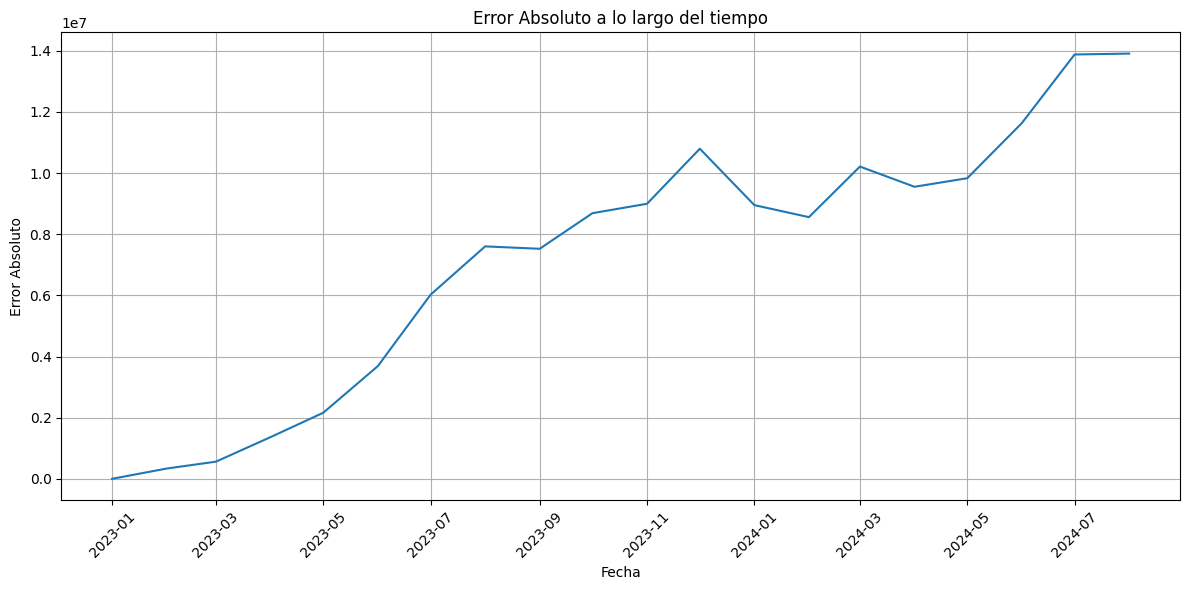

In [37]:
# prompt: grafica para representar el Absolute_Error

# Assuming 'reales_spain_grouped' DataFrame exists with 'DATE' and 'Absolute_Error' columns.

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(reales_spain_grouped['DATE'], reales_spain_grouped['Absolute_Error'])

plt.xlabel('Fecha')
plt.ylabel('Error Absoluto')
plt.title('Error Absoluto a lo largo del tiempo')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()